<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/PortfolioCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementar a otimização do portfólio Markowitz 
Use fastquant para maximizar os retornos de sua carteira de ações, considerando seu perfil de risco geral

##Algumas ideias básicas
Stock ou Share é uma unidade de propriedade em uma empresa. Quando você investe no mercado de ações (o mercado de ações é basicamente um lugar para comprar ou vender ações), existem 2 maneiras principais de ganhar:

Dividendo - Este é um valor pago a você por uma empresa pelo seu investimento.
Stock Trading - O lucro que você faz para comprar/vender ações.
Portfólio - Uma combinação de ativos de um indivíduo/investidor.
Fundamentalmente, você pode ganhar dinheiro comprando algumas ações, na esperança de que seu preço aumente no futuro.

Na verdade, existem maneiras inteligentes de como ganhar, mesmo que você preveja que o preço de uma ação cairá, mas isso está fora do escopo.

Então,  vamos simplificar demais e o que queremos é comprar uma ação barata, e vendê-la quando seu preço subir porque assim teremos lucro. Caso contrário, incorreremos em prejuízo, se decidirmos vender uma ação a um preço mais barato.

##Teoria Moderna do Portfólio (Modelo Markowitz)
Como mencionado acima, investir no mercado de ações pode resultar em lucro ou prejuízo.

Em poucas palavras, a Teoria Moderna do Portfólio é uma maneira de maximizar o retorno de um determinado risco. Em breve definiremos o que significa retorno e risco.

Vamos entender isso usando um exemplo.

Suponha que você queira investir no mercado de ações. Após concluir sua pesquisa, você decidiu investir nas seguintes empresas:

MEG
MÁX.
JFC
TODOS
Vamos baixar os dados para isso usando uma biblioteca python chamada fastquant. Na verdade, foi desenvolvido por um colega filipino Data Scientist. O objetivo é democratizar os investimentos orientados por dados para todos.

NOTA O modelo que usaremos baseia-se na suposição de que os retornos são normalmente distribuídos. Portanto, ajuda se tivermos um grande número de pontos de dados.

In [1]:
!pip install fastquant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 4.5 MB/s 
     |████████████████████████████████| 1.5 MB 34.5 MB/s 
     |████████████████████████████████| 140 kB 45.5 MB/s 
     |████████████████████████████████| 128 kB 50.1 MB/s 
     |████████████████████████████████| 9.5 MB 33.8 MB/s 
     |████████████████████████████████| 199 kB 38.2 MB/s 
     |████████████████████████████████| 410 kB 6.3 MB/s 
     |████████████████████████████████| 3.3 MB 37.4 MB/s 
     |████████████████████████████████| 843 kB 35.8 MB/s 
     |████████████████████████████████| 96 kB 4.5 MB/s 
     |████████████████████████████████| 271 kB 37.3 MB/s 
     |████████████████████████████████| 4.1 MB 33.2 MB/s 
     |████████████████████████████████| 1.2 MB 41.7 MB/s 
     |████████████████████████████████| 288 kB 38.2 MB/s 
     |████████████████████████████████| 127 kB 41.3 MB/s 
     |█████████████████████████████

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import scipy.optimize as optimization
from fastquant import get_stock_data
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 7.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.67
    Uninstalling yfinance-0.1.67:
      Successfully uninstalled yfinance-0.1.67


In [4]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
#Portfólio 
symbols = ['SOL-USD','BNB-USD','LTC-USD','BTC-USD','AAVE-USD','ETH-USD','ETHDOWN-USD','BTCDOWN-USD','ADADOWN-USD','BNBDOWN-USD']
portfolio = web.get_data_yahoo(symbols, period='1y')['Close']
portfolio = portfolio.rename(columns={'SOL-USD':'Solana','BNB-USD':'BNB','LTC-USD':'Litecoin','BTC-USD':'Bitcoin','AAVE-USD':'AAVE','ETH-USD':'Ethereum',
                                      'ETHDOWN-USD':'EthereumDown','BTCDOWN-USD':'BitcoinDown','ADADOWN-USD':'CardanoDown','BNBDOWN-USD':'BNBDown'                             })

[*********************100%***********************]  10 of 10 completed


In [6]:
portfolio

,AAVE,CardanoDown,BNB,BNBDown,Bitcoin,BitcoinDown,Ethereum,EthereumDown,Litecoin,Solana
Date,,,,,,,,,,
2021-09-01,413.896088,0.003100,490.068726,0.311213,48847.027344,0.018646,3834.828125,1.195384,180.972168,111.033005
2021-09-02,400.070374,0.002702,483.921051,0.323134,49327.722656,0.018198,3790.989990,1.234512,183.617249,128.102386
2021-09-03,395.069244,0.002694,488.604706,0.314573,50025.375000,0.017204,3940.614746,1.102256,212.965973,146.583054
2021-09-04,398.209900,0.002975,498.078430,0.299865,49944.625000,0.017310,3887.828369,1.155637,212.358459,139.113068
2021-09-05,416.940094,0.002781,504.619873,0.290489,51753.410156,0.015965,3952.133545,1.106338,231.333984,142.070877
...,...,...,...,...,...,...,...,...,...,...
2022-08-28,78.536636,0.005427,276.250885,0.045249,19616.814453,0.035498,1430.547363,1.093431,53.612019,30.392286
2022-08-29,85.678185,0.004863,286.221405,0.041489,20297.994141,0.032800,1553.037354,0.956531,55.771893,32.465298
2022-08-30,84.638634,0.004807,281.425354,0.043139,19796.808594,0.034640,1523.838867,0.990380,53.056812,31.412056



Agora, vamos nos perguntar. Por que não investimos em uma única empresa, em vez de investir em várias empresas?

A Teoria Moderna do Portfólio nos diz que podemos minimizar nossa perda através da diversificação. Vamos entender isso com um exemplo.

Suponha que você decidiu investir em janeiro de 2017. Para fins de ilustração, vamos considerar o período de janeiro de 2017 a maio de 2018.

Caso 1: Você investiu apenas no MAXS
Caso 2: Você decidiu investir 50% no MAXS e os outros 50% no JFC
Se você decidir seguir com o caso 1, ficará claro que poderá perder algum dinheiro imediatamente (já que o gráfico mostra uma tendência decrescente). Se você optar pelo Caso 2, sua perda pode ter sido mitigada, pois o preço do JFC está aumentando durante esse período.

Claro que você poderia argumentar que "por que não investir todo o meu dinheiro no JFC", bem, meu contra-argumento para isso seria, quando o JFC está experimentando um declínio em seu preço, haveria alguma outra empresa que está realmente experimentando um aumento em seu preço. preço.

##Dica importante
Invista em várias ações, tanto quanto possível, para minimizar sua perda. (Tecnicamente não correlacionado ou negativamente correlacionado)

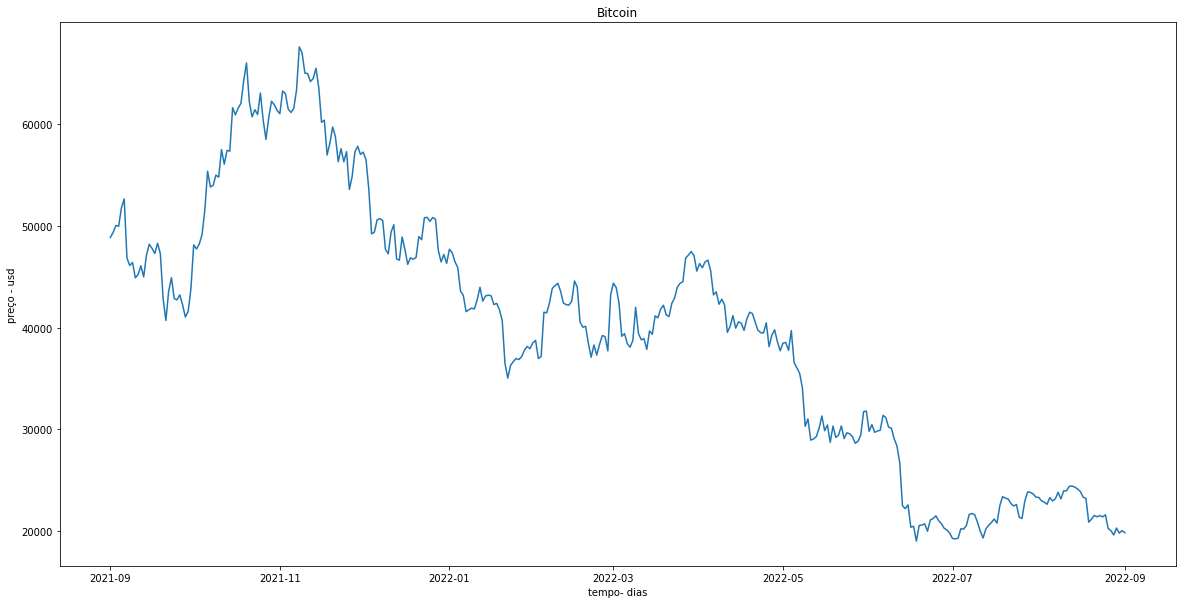

In [7]:
a= portfolio.Bitcoin
p = plt.plot(a.index, a.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('Bitcoin');

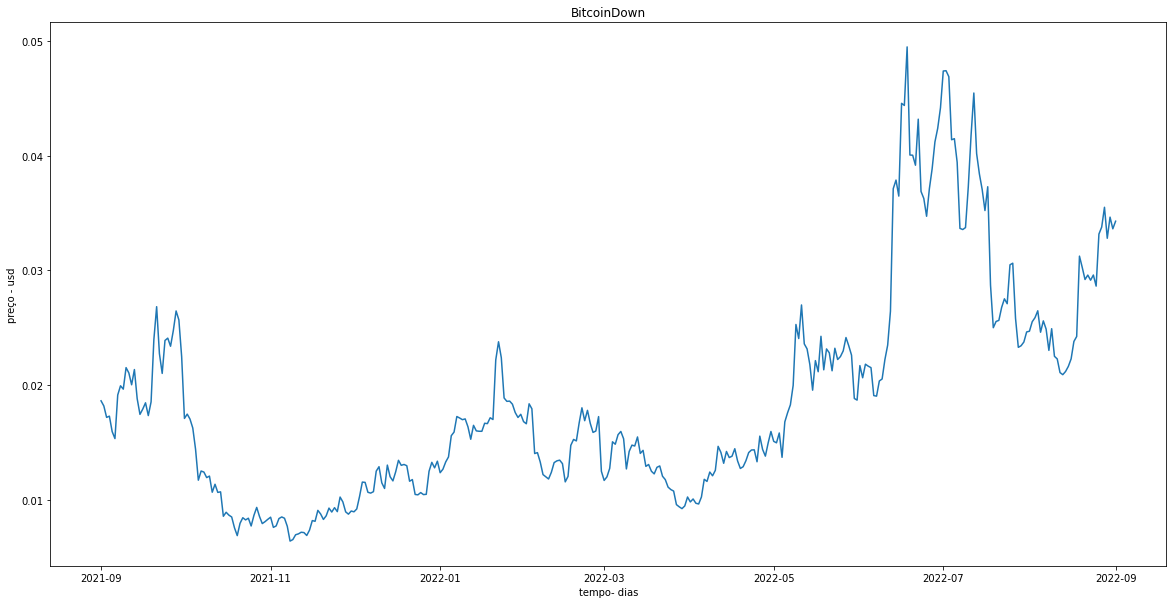

In [8]:
#BitcoinDown
bd= portfolio.BitcoinDown
x = plt.plot(bd.index, bd.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('BitcoinDown');

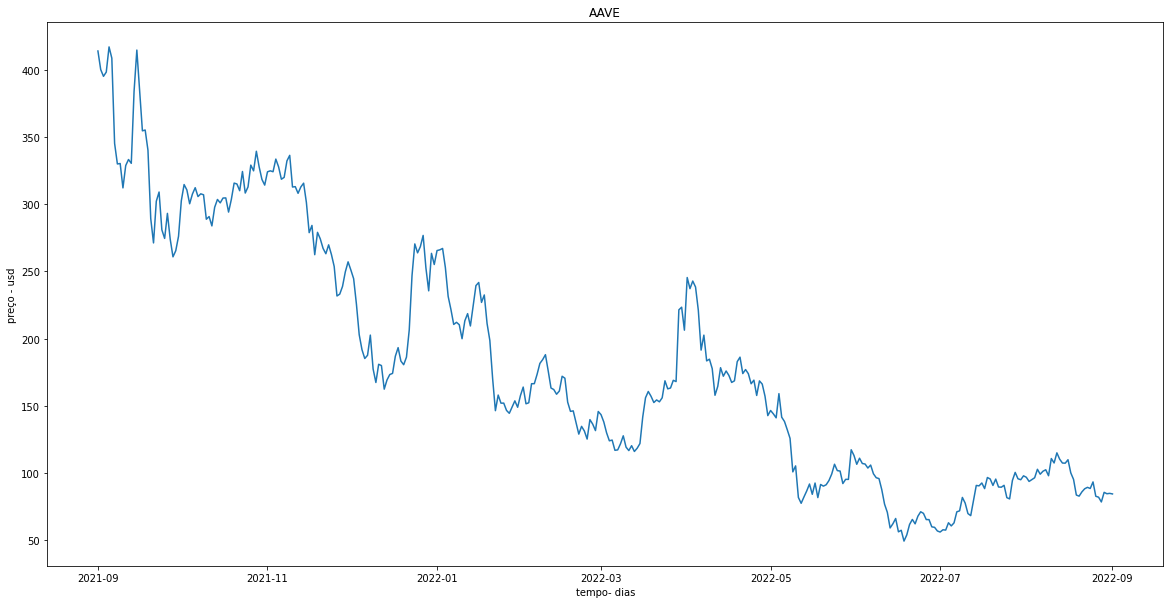

In [9]:
b= portfolio.AAVE
p = plt.plot(b.index, b.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('AAVE');

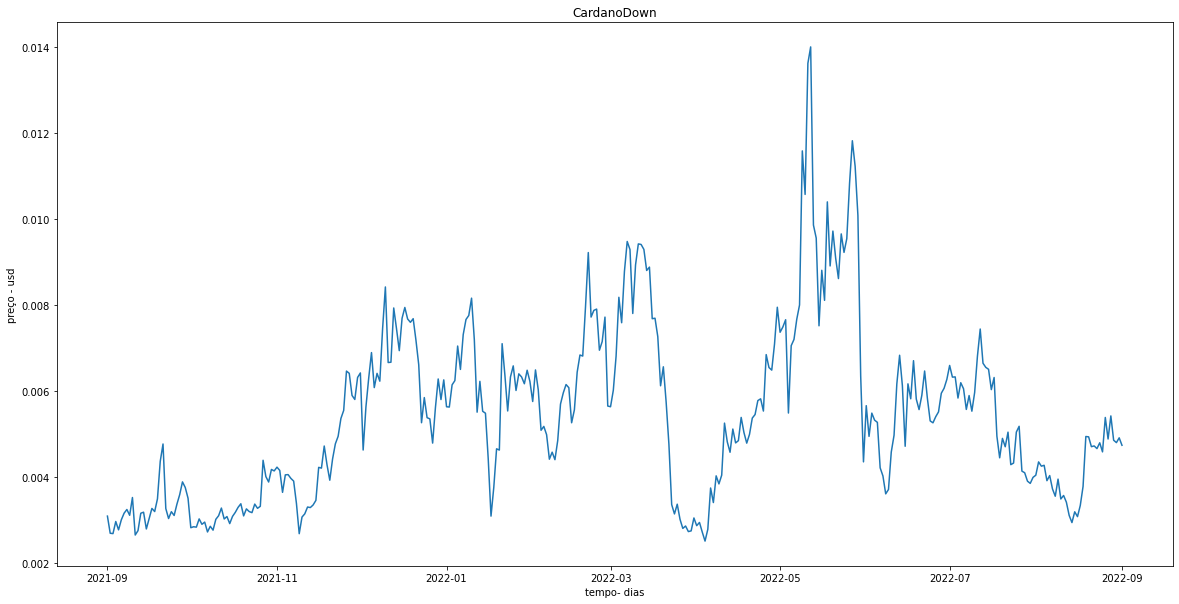

In [10]:
#CardanoDown
cd= portfolio.CardanoDown
p = plt.plot(cd.index, cd.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('CardanoDown');

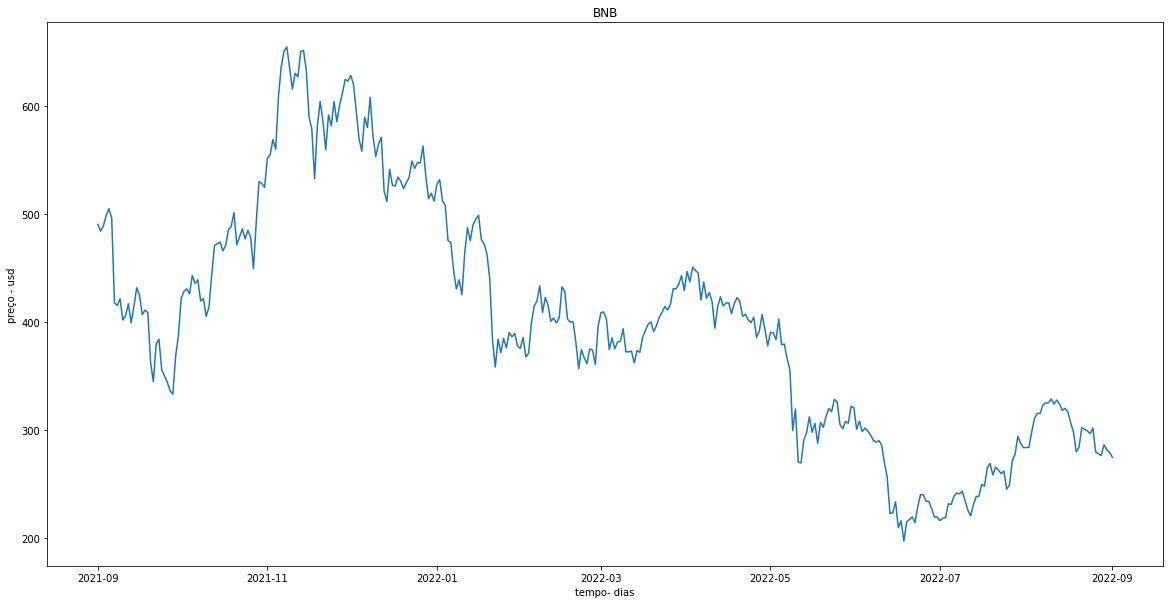

In [11]:
c= portfolio.BNB
p = plt.plot(c.index, c.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('BNB');

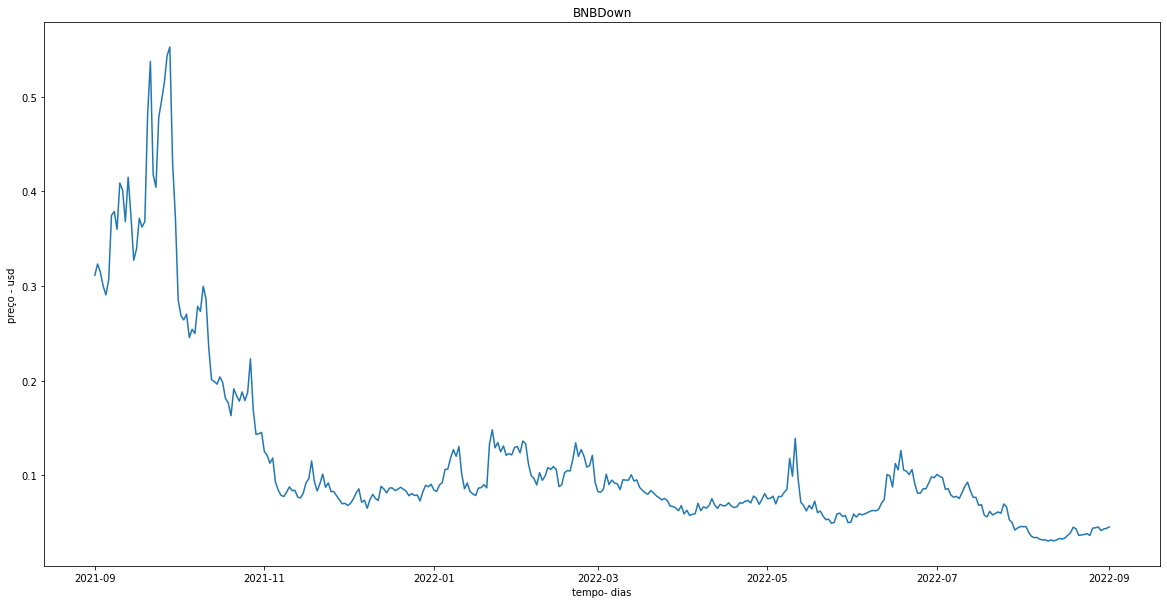

In [12]:
#BNBDown
bbd= portfolio.BNBDown
p = plt.plot(bbd.index, bbd.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('BNBDown');

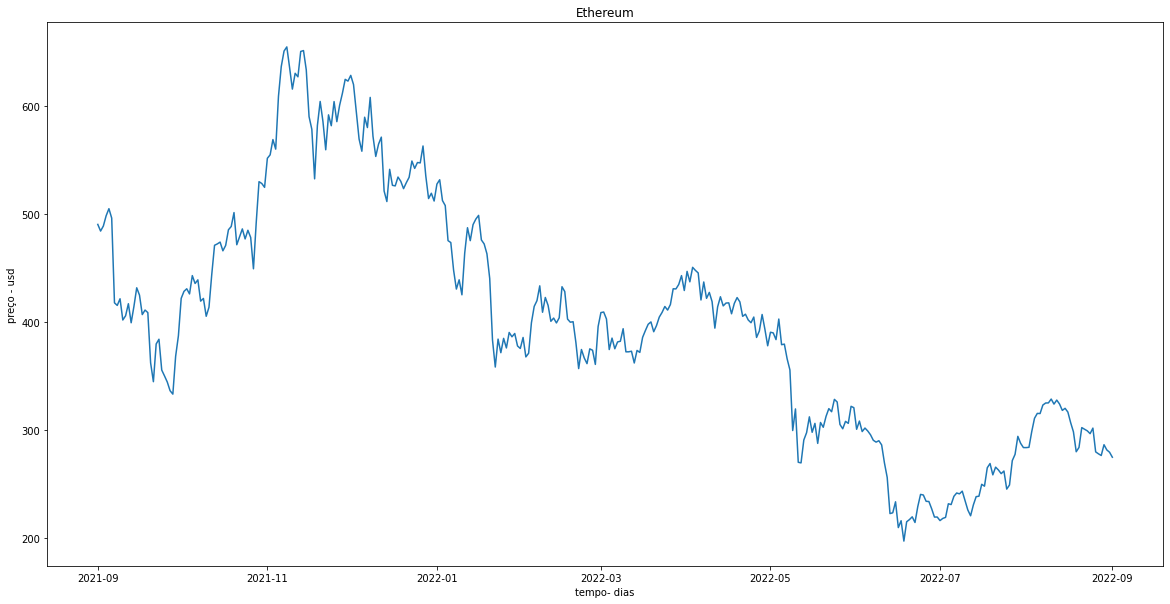

In [13]:

d= portfolio.Ethereum
p = plt.plot(c.index, c.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('Ethereum');

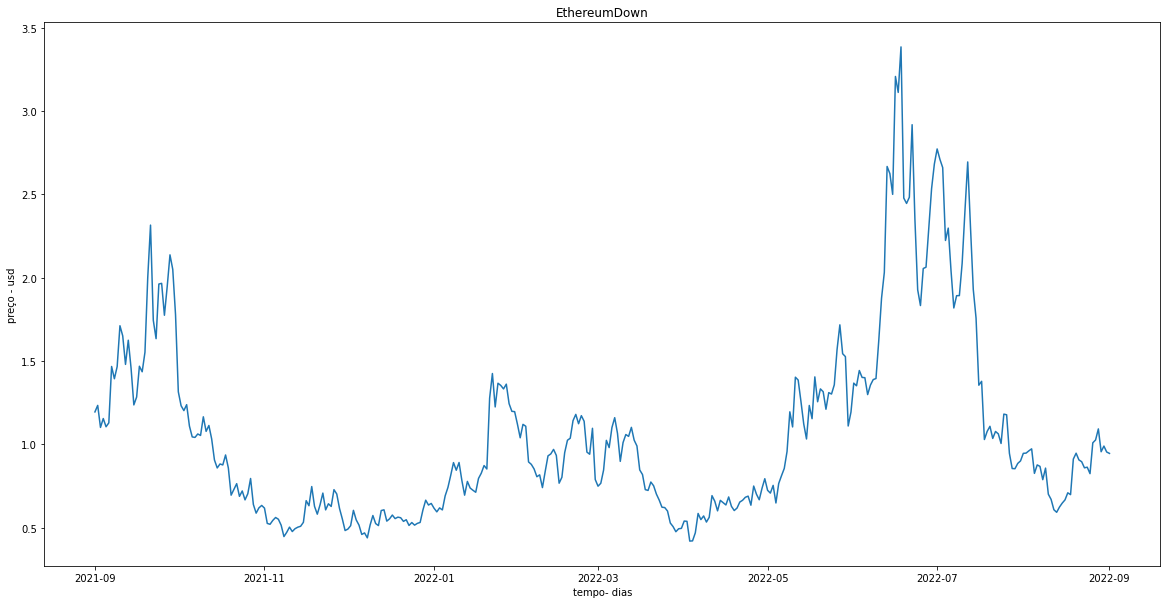

In [14]:
#EthereumDown
ed= portfolio.EthereumDown
p = plt.plot(ed.index, ed.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('EthereumDown');


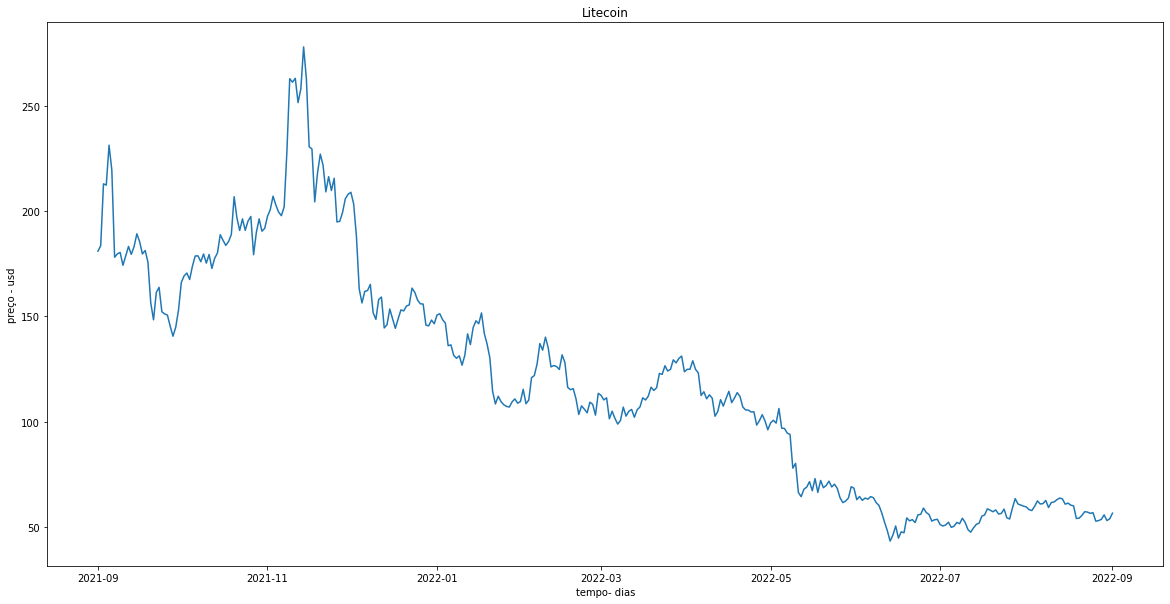

In [15]:
 
e= portfolio.Litecoin
p = plt.plot(e.index, e.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('Litecoin');

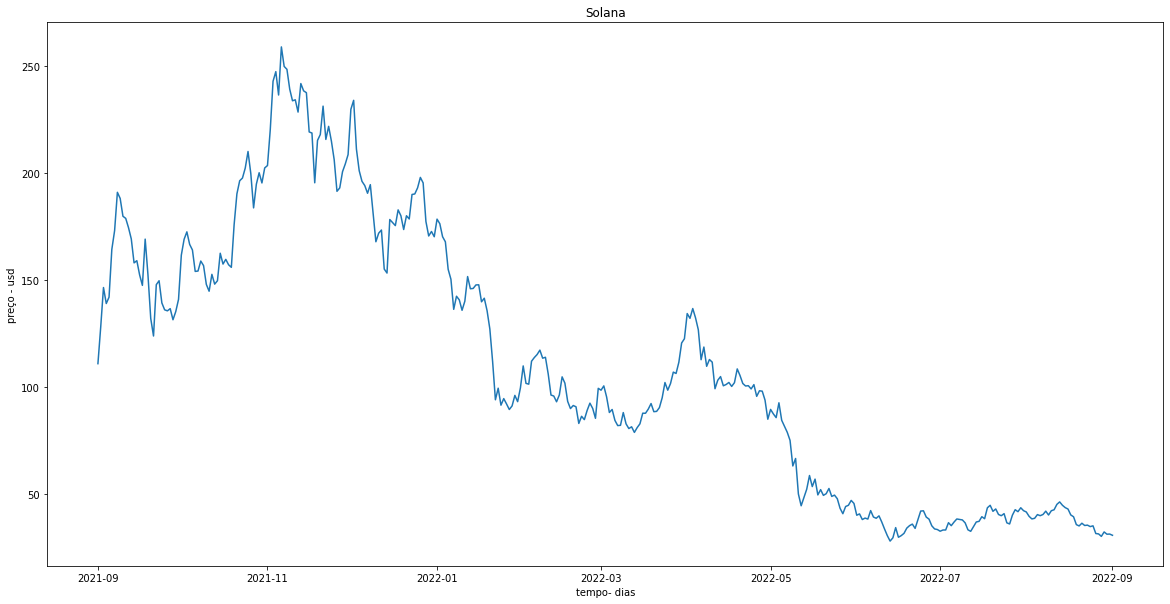

In [16]:

f= portfolio.Solana
p = plt.plot(f.index, f.values)
plt.xlabel('tempo- dias');
plt.ylabel('preço - usd');
plt.title('Solana');

Agora, vamos definir o que é um retorno. Intuitivamente, podemos definir retorno como:

O preço das ações hoje menos o preço das ações ontem. Divida a diferença pelo preço das ações ontem

Mais formalmente,

O retorno de tempos em tempos é dado por:

In [17]:
#retornos
returns = portfolio.pct_change()
returns

,AAVE,CardanoDown,BNB,BNBDown,Bitcoin,BitcoinDown,Ethereum,EthereumDown,Litecoin,Solana
Date,,,,,,,,,,
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-02,-0.033404,-0.128387,-0.012545,0.038305,0.009841,-0.024027,-0.011432,0.032733,0.014616,0.153733
2021-09-03,-0.012501,-0.002961,0.009679,-0.026494,0.014143,-0.054621,0.039469,-0.107132,0.159836,0.144265
2021-09-04,0.007950,0.104306,0.019389,-0.046755,-0.001614,0.006161,-0.013395,0.048429,-0.002853,-0.050961
2021-09-05,0.047036,-0.065210,0.013133,-0.031267,0.036216,-0.077701,0.016540,-0.042660,0.089356,0.021262
...,...,...,...,...,...,...,...,...,...,...
2022-08-28,-0.043170,0.109589,-0.005582,0.019099,-0.021202,0.051045,-0.040799,0.064560,0.010590,-0.036463
2022-08-29,0.090933,-0.103925,0.036092,-0.083096,0.034724,-0.076004,0.085625,-0.125202,0.040287,0.068208
2022-08-30,-0.012133,-0.011516,-0.016756,0.039770,-0.024691,0.056098,-0.018801,0.035387,-0.048682,-0.032442


A média dos retornos é chamada de Retorno Esperado.

Da mesma forma, o Risco ou Volatilidade é o desvio padrão dos retornos.

(Isso é diferente do retorno esperado e da volatilidade de um portfólio, isso é para uma única ação)

In [18]:
returns.mean()

AAVE           -0.002181
CardanoDown     0.008368
BNB            -0.000756
BNBDown        -0.000355
Bitcoin        -0.001844
BitcoinDown     0.005309
Ethereum       -0.001425
EthereumDown    0.004942
Litecoin       -0.002026
Solana         -0.001687
dtype: float64

In [19]:
returns.std()

AAVE            0.066153
CardanoDown     0.120215
BNB             0.040460
BNBDown         0.100480
Bitcoin         0.035148
BitcoinDown     0.086186
Ethereum        0.045387
EthereumDown    0.106527
Litecoin        0.047761
Solana          0.060194
dtype: float64

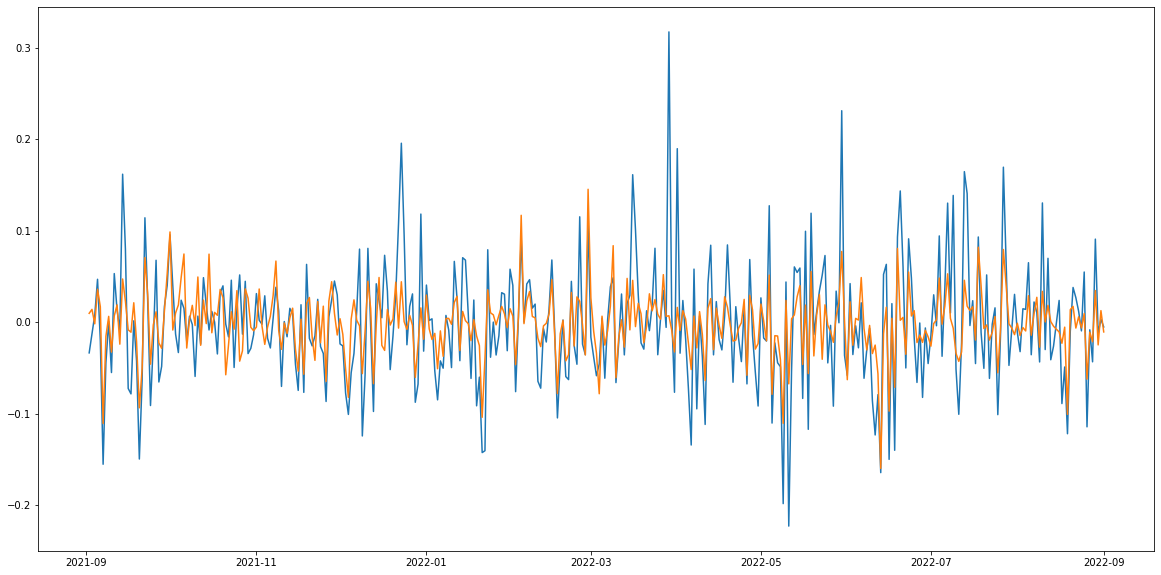

In [20]:
#Retorno Bitcoin AAVE
r1 = returns[['AAVE','Bitcoin']]
rer =  plt.plot(r1.index, r1.values)

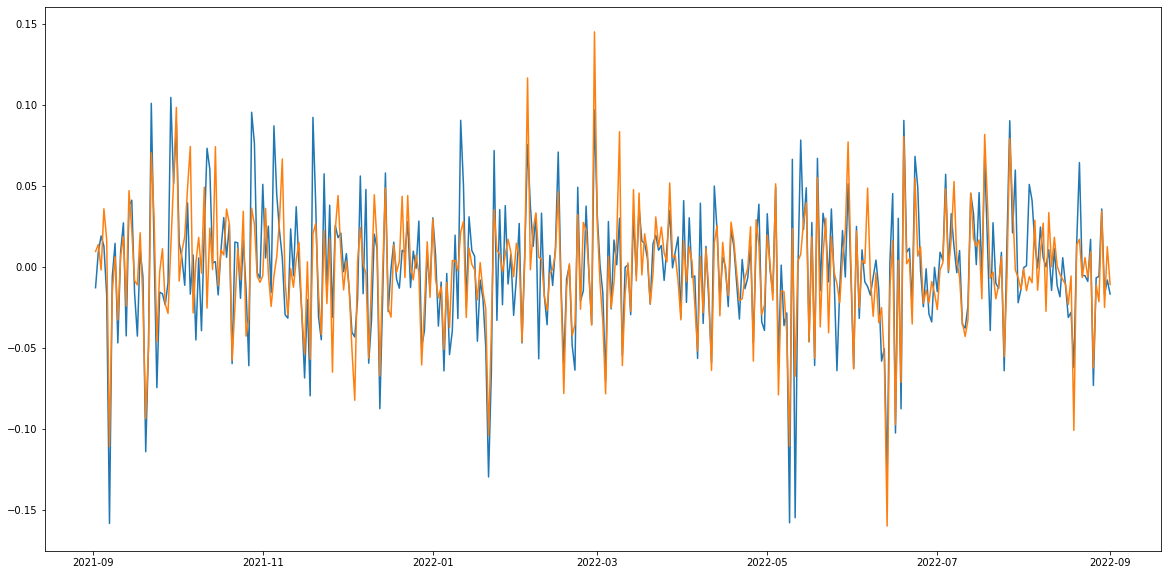

In [21]:
#Retorno Bitcoin BNB
r2 = returns[['BNB','Bitcoin']]
rer2 =  plt.plot(r2.index, r2.values)

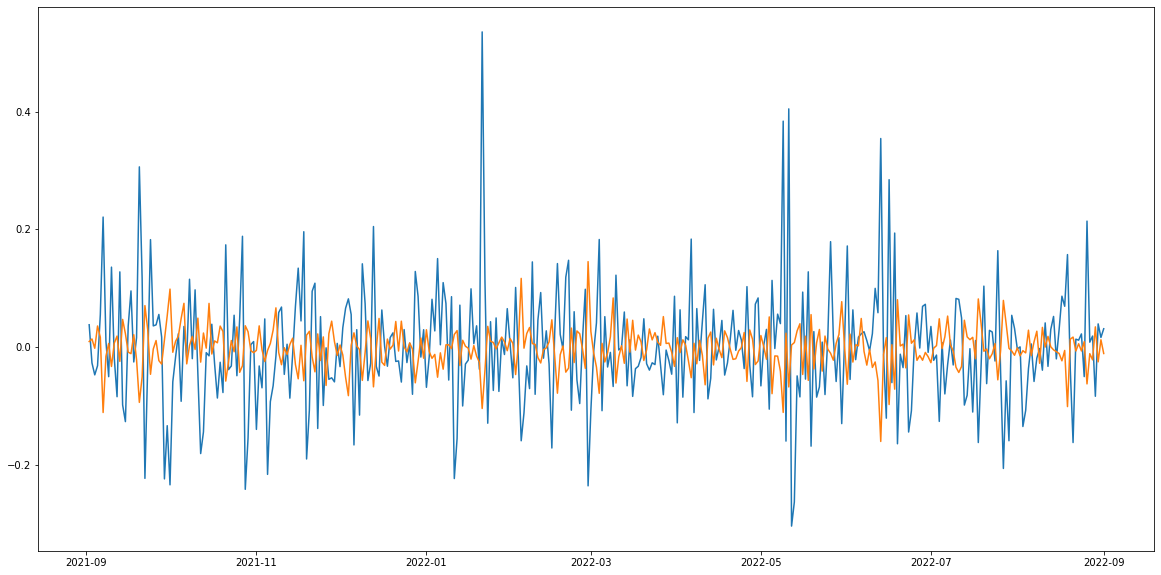

In [22]:
#Retorno Bitcoin BNBdown
r3 = returns[['BNBDown','Bitcoin']]
rer3 =  plt.plot(r3.index, r3.values)

##Retorno e Risco Esperados de uma Carteira

In [23]:
weights = np.random.random(len(symbols))
weights /= np.sum(weights)
weights

array([0.03515865, 0.08617922, 0.06335652, 0.10908772, 0.15319648,
       0.10924119, 0.12329684, 0.08426797, 0.10286671, 0.13334871])

In [24]:
returns.mean()

AAVE           -0.002181
CardanoDown     0.008368
BNB            -0.000756
BNBDown        -0.000355
Bitcoin        -0.001844
BitcoinDown     0.005309
Ethereum       -0.001425
EthereumDown    0.004942
Litecoin       -0.002026
Solana         -0.001687
dtype: float64

In [25]:
def calculate_portfolio_return(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print("Expected Portfolio Return:", portfolio_return)

In [26]:
calculate_portfolio_return(returns,weights)

Expected Portfolio Return: 0.16700880285007996


Retorno de portfólio esperado: 0,05256184288875601
Se você fez um curso de Probabilidade, você deve se lembrar de que a expectativa de uma variável aleatória é linear, enquanto a variância não é. Esse é o mesmo argumento porque a fórmula para a variância de uma carteira é bem mais complicada.

In [27]:
returns.cov()

,AAVE,CardanoDown,BNB,BNBDown,Bitcoin,BitcoinDown,Ethereum,EthereumDown,Litecoin,Solana
AAVE,0.004376,-0.005276,0.001917,-0.004494,0.001688,-0.004033,0.002346,-0.005260,0.002251,0.002625
CardanoDown,-0.005276,0.014452,-0.003400,0.008503,-0.003069,0.007500,-0.003962,0.009476,-0.004343,-0.004918
BNB,0.001917,-0.003400,0.001637,-0.003900,0.001132,-0.002670,0.001530,-0.003513,0.001499,0.001684
BNBDown,-0.004494,0.008503,-0.003900,0.010096,-0.002704,0.006646,-0.003616,0.008604,-0.003528,-0.003918
Bitcoin,0.001688,-0.003069,0.001132,-0.002704,0.001235,-0.002962,0.001402,-0.003202,0.001368,0.001457
BitcoinDown,-0.004033,0.007500,-0.002670,0.006646,-0.002962,0.007428,-0.003356,0.007847,-0.003268,-0.003418
Ethereum,0.002346,-0.003962,0.001530,-0.003616,0.001402,-0.003356,0.002060,-0.004645,0.001765,0.002071
EthereumDown,-0.005260,0.009476,-0.003513,0.008604,-0.003202,0.007847,-0.004645,0.011348,-0.004088,-0.004715
Litecoin,0.002251,-0.004343,0.001499,-0.003528,0.001368,-0.003268,0.001765,-0.004088,0.002281,0.001993
Solana,0.002625,-0.004918,0.001684,-0.003918,0.001457,-0.003418,0.002071,-0.004715,0.001993,0.003623


In [28]:
np.sqrt(returns.cov())

,AAVE,CardanoDown,BNB,BNBDown,Bitcoin,BitcoinDown,Ethereum,EthereumDown,Litecoin,Solana
AAVE,0.066153,NaN,0.043785,NaN,0.041082,NaN,0.048434,NaN,0.047446,0.051233
CardanoDown,NaN,0.120215,NaN,0.092213,NaN,0.086602,NaN,0.097346,NaN,NaN
BNB,0.043785,NaN,0.040460,NaN,0.033641,NaN,0.039112,NaN,0.038712,0.041041
BNBDown,NaN,0.092213,NaN,0.100480,NaN,0.081523,NaN,0.092760,NaN,NaN
Bitcoin,0.041082,NaN,0.033641,NaN,0.035148,NaN,0.037449,NaN,0.036982,0.038168
BitcoinDown,NaN,0.086602,NaN,0.081523,NaN,0.086186,NaN,0.088581,NaN,NaN
Ethereum,0.048434,NaN,0.039112,NaN,0.037449,NaN,0.045387,NaN,0.042014,0.045504
EthereumDown,NaN,0.097346,NaN,0.092760,NaN,0.088581,NaN,0.106527,NaN,NaN
Litecoin,0.047446,NaN,0.038712,NaN,0.036982,NaN,0.042014,NaN,0.047761,0.044638
Solana,0.051233,NaN,0.041041,NaN,0.038168,NaN,0.045504,NaN,0.044638,0.060194


In [29]:
returns.std()

AAVE            0.066153
CardanoDown     0.120215
BNB             0.040460
BNBDown         0.100480
Bitcoin         0.035148
BitcoinDown     0.086186
Ethereum        0.045387
EthereumDown    0.106527
Litecoin        0.047761
Solana          0.060194
dtype: float64

In [30]:
def calculate_portfolio_risk(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    print("Expected Risk:", portfolio_variance)

In [31]:
calculate_portfolio_risk(returns,weights)

Expected Risk: 0.23195974404430247


##Razão de Sharpe
Lembre-se, o que queremos é encontrar o melhor vetor de peso possível que nos dê o melhor retorno possível, com um risco mínimo. Portanto, vamos introduzir uma nova métrica chamada razão de sharpe.



In [32]:
def generate_portfolios(weights, returns):

    preturns = []
    pvariances = []


    for i in range(10000):
        weights = np.random.random(len(symbols))
        weights/=np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))

    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns,pvariances

def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

In [33]:
preturns, pvariances = generate_portfolios(weights,returns)

##Simulação de Monte Carlo
Aqui, simulamos 10.000 possíveis alocações de peso e computamos seus respectivos retornos esperados, risco e razão de Sharpe.

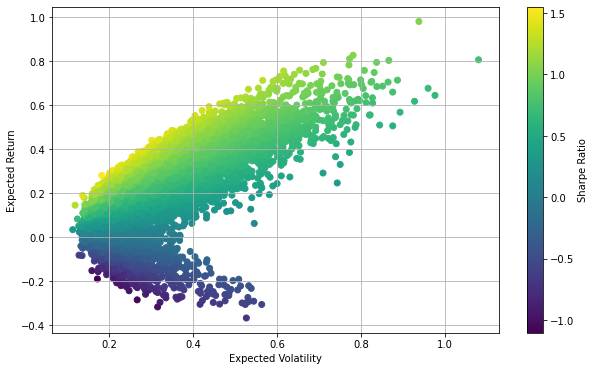

In [34]:
plot_portfolios(preturns, pvariances)

##Encontrando e plotando os pesos ideais (da maneira mais difícil)

In [35]:
def statistics(weights, returns):
    portfolio_return=np.sum(returns.mean()*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])


def min_func_sharpe(weights,returns):
    return -statistics(weights,returns)[2] 


def optimize_portfolio(weights,returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) 
    bounds = tuple((0,1) for x in range(len(symbols))) 
    optimum=optimization.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints) 
    return optimum


def print_optimal_portfolio(optimum, returns):
    print("Optimal weights:", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio:", statistics(optimum['x'].round(3),returns))

def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.show()

Optimal weights: [0.    0.07  0.17  0.    0.083 0.144 0.383 0.127 0.009 0.014]
Expected return, volatility and Sharpe ratio: [0.27938674 0.16758813 1.66710341]


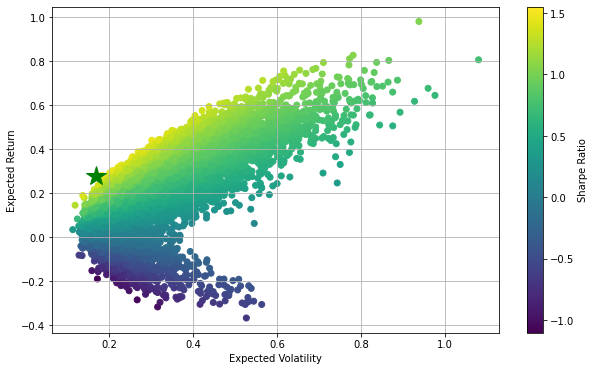

In [36]:
optimum=optimize_portfolio(weights,returns)
print_optimal_portfolio(optimum, returns)
show_optimal_portfolio(optimum, returns, preturns, pvariances)

##Encontrando e plotando os Pesos Ótimos (a maneira fastquant)

In [37]:
from fastquant import Portfolio

In [38]:
stock_list = ['SOL-USD','BNB-USD','LTC-USD','BTC-USD','AAVE-USD','ETH-USD','ETHDOWN-USD','BTCDOWN-USD','ADADOWN-USD','BNBDOWN-USD']
p = Portfolio(stock_list,"2021-08-30", "2022-08-30")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Optimal weights: [0.    0.177 0.    0.054 0.    0.428 0.112 0.157 0.073 0.   ]
Expected return, volatility and Sharpe ratio: [0.3055302833669167, 0.17649644501610082, 1.7310846308493342]


##Gráfico Interativo

In [39]:
!pip3 install altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import altair as alt
alt.renderers.set_embed_options(actions=False)

RendererRegistry.enable('colab')

In [41]:
weights = pd.DataFrame(optimum['x'].round(2),columns=['weights'])
weights['Symbols'] = symbols

In [42]:
returns,variances = p.generate_portfolios(N=5000)
portfolios = pd.DataFrame()
portfolios['Expected Return'] = returns
portfolios['Expected Volatility'] = variances
portfolios['Sharpe Ratio'] = portfolios['Expected Return'] / portfolios['Expected Volatility']
minimumX = portfolios['Expected Volatility'].min()
maximumX = portfolios['Expected Volatility'].max()
minimumY = portfolios['Expected Return'].min()
maximumY = portfolios['Expected Return'].max()


optimum = p.calculate_statistics(p.optimum_weights)
optimal = pd.DataFrame()
optimal['Expected Return'] = [optimum[0]]
optimal['Expected Volatility'] = [optimum[1]]
optimal['Sharpe Ratio'] = [optimum[2]]
optimal['img'] = "https://img.icons8.com/clouds/100/000000/us-dollar--v1.png"

In [43]:
chart = alt.Chart(portfolios).mark_circle().encode(
    x = alt.X('Expected Volatility',scale=alt.Scale(domain=[minimumX,maximumX])),
    y = alt.X('Expected Return',scale=alt.Scale(domain=[minimumY,maximumY])),
    color = alt.Color('Sharpe Ratio',scale=alt.Scale(range=['blue','yellow'])),
    tooltip = ['Sharpe Ratio']

).properties(height=350,width=500)

optimal_chart = alt.Chart(optimal).mark_image(height=60,width=60).encode(
    x = alt.X('Expected Volatility',scale=alt.Scale(domain=[minimumX,maximumX])),
    y = alt.X('Expected Return',scale=alt.Scale(domain=[minimumY,maximumY])),
    color = alt.Color('Sharpe Ratio',scale=alt.Scale(range=['blue','yellow'])),
    tooltip = ['Sharpe Ratio'],
    url = 'img'

).properties(height=350,width=500)

visualization = chart+optimal_chart

visualization

alt.LayerChart(...)